## Observations and Insights 

In [157]:
#Observations or inferences that can be made from the data:
#1) Although there were more mice per treatment with Capomulin and Ramicane, the sample is well disributed with over 150 mice per treatment. 
#2) The sample is also very well distributed in regards to the mice sex with 50.7% male and 49.3% female. 
#3) Capomulin and Ramicane were used to treat mice with smaller tumor volume in the range of 30 to 40 mm3, 
#4) ...whereas Infubinol and Ceftamin were used to treat mice with larger tumor volume of over 60 mm3.   
#5) For mouse s185 treated with Capomulin there is a clear effect of the treatment which reduced the tumor volume from 45mm3 to under 25mm3.
#6) For mice treated with Capomulin, there is a strong and positive correlation between Mouse Weight and Average Tumor Volume (mm3) of 0.84
#7) According to the regression for mice treated with Capomulin, the tumor size is larger for mice that weigh more...
#8) ...hence we could infer that the heavier the mouse, the larger the tumor size.  

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.DataFrame(mouse_metadata)
#mouse_df 
study_df = pd.DataFrame(study_results)
#study_df 
merge_df = pd.merge(mouse_df, study_df, on="Mouse ID")


# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [158]:
# Checking the number of mice.
mice = merge_df["Mouse ID"].unique()
#mice
mice_total = len(mice)
mice_total

249

In [159]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]

In [160]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRowsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [161]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#merge_df.count()
clean_df = merge_df.drop([909,911,913,915,917], axis=0)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [162]:
# Checking the number of mice in the clean DataFrame.
clean_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [163]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
average = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).mean()
med = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).median()
var = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).var()
stdev = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).std()
error = clean_df['Tumor Volume (mm3)'].groupby(clean_df['Drug Regimen']).sem()

#average
#med
#var
#stdev
#error

summary = pd.DataFrame({"Mean Tumor Vol (mm3)": average,
                       "Median Tumor Vol (mm3)" : med,
                        "Variance":var,
                        "Standard Deviation":stdev,
                        "SEM":error
                       })
summary

,Mean Tumor Vol (mm3),Median Tumor Vol (mm3),Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

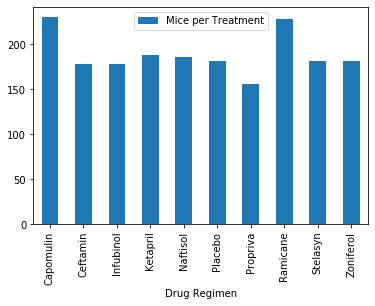

In [164]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_pertreat = pd.DataFrame(clean_df["Mouse ID"].groupby(clean_df['Drug Regimen']).count())
mice_pertreat.rename(columns={"Mouse ID":"Mice per Treatment"}, inplace=True)
#mice_pertreat
mice_pertreat.plot(kind="bar")

Text(0, 0.5, 'Number of Mice')

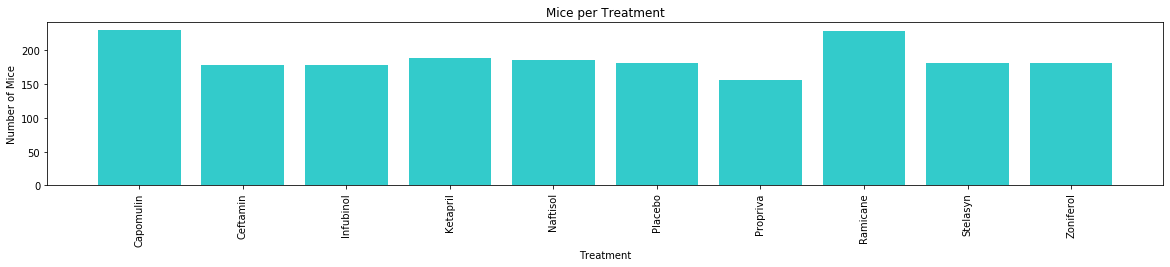

In [165]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_pertreat = pd.DataFrame(clean_df["Mouse ID"].groupby(clean_df['Drug Regimen']).count())
#mice_pertreat

# Set x axis and tick locations
x_axis = np.arange(len(mice_pertreat))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, mice_pertreat["Mouse ID"], color='c', alpha=.8, align="center")
plt.xticks(tick_locations, mice_pertreat.index, rotation="vertical")
plt.title("Mice per Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Mice")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000150643E73C8>],
      dtype=object)

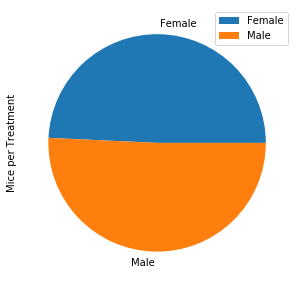

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_bygender = pd.DataFrame(clean_df["Mouse ID"].groupby(clean_df['Sex']).count())
mice_bygender.rename(columns={"Mouse ID":"Mice per Treatment"}, inplace=True)
#mice_bygender
mice_bygender.plot.pie(subplots=True, figsize=(5, 5))

([<matplotlib.patches.Wedge at 0x15064430348>,
 [Text(-0.6872462450269542, -0.8588903298421469, 'Male'),
  Text(0.6872463254420675, 0.8588902654975058, 'Female')],
 [Text(-0.37486158819652043, -0.46848563445935276, '50.7%'),
  Text(0.3748616320593095, 0.46848559936227585, '49.3%')])

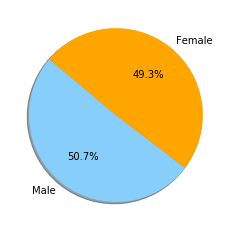

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_bygender = pd.DataFrame(clean_df["Mouse ID"].groupby(clean_df['Sex']).count())
mice_bygender
#Male = mice_bygender['Mouse ID'][1] 
#Female = mice_bygender['Mouse ID'][0]
#print(Male)
#print(Female)
labels = ["Male", "Female"]
sizes = [mice_bygender['Mouse ID'][1],mice_bygender['Mouse ID'][0]]
colors = ["lightskyblue", "orange"]
#explode = (0, 0, 0, 0)
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [168]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_df.loc[clean_df['Drug Regimen']=="Capomulin"]
#len(capomulin["Mouse ID"].unique())
ramicane = clean_df.loc[clean_df['Drug Regimen']=="Ramicane"]
#len(ramicane["Mouse ID"].unique())
infubinol = clean_df.loc[clean_df['Drug Regimen']=="Infubinol"]
#len(infubinol["Mouse ID"].unique())
ceftamin = clean_df.loc[clean_df['Drug Regimen']=="Ceftamin"]
#len(ceftamin["Mouse ID"].unique())

# Start by getting the last (greatest) timepoint for each mouse
#For Capomulin
capomulin_max = capomulin.sort_values("Timepoint", ascending=False)
capomulin_max = capomulin_max.reset_index(drop=True)
capomulin_final = capomulin_max.drop(capomulin_max.index[25:230])
#capomulin_final

#For Ramicane
ramicane_max = ramicane.sort_values("Timepoint", ascending=False)
ramicane_max  = ramicane_max.reset_index(drop=True)
ramicane_final = ramicane_max.drop(ramicane_max.index[25:230])
#ramicane_final

#For Infubinol
infubinol_max = infubinol.sort_values("Timepoint", ascending=False)
infubinol_max  = infubinol_max.reset_index(drop=True)
infubinol_final = infubinol_max.drop(infubinol_max.index[25:230])
#infubinol_final

#For Ceftamin
ceftamin_max = ceftamin.sort_values("Timepoint", ascending=False)
ceftamin_max  = ceftamin_max.reset_index(drop=True)
ceftamin_final = ceftamin_max.drop(ceftamin_max.index[25:230])
#ceftamin_final

#Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [169]:
# Put treatments into a list for for loop (and later for plot labels)
treaments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes    
# add subset 
# Create empty list to fill with tumor vol data (for plotting)
capomulin_vol = capomulin_final["Tumor Volume (mm3)"]
ramicane_vol = ramicane_final["Tumor Volume (mm3)"]
infubinol_vol = infubinol_final["Tumor Volume (mm3)"]
ceftamin_vol = ceftamin_final["Tumor Volume (mm3)"]

# Determine outliers using upper and lower bounds
#For Capomulin
quartiles = capomulin_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of tumor volume (mm3) for Capomulin is: {lowerq}")
print(f"The upper quartile of tumor volume (mm3) for Capomulin is: {upperq}")
print(f"The interquartile range of tumor volume (mm3) for Capomulin is: {iqr}")
print(f"The the median tumor volume (mm3) for Capomulin  is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#For Ramicane
quartiles = ramicane_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of tumor volume (mm3) for Ramicane is: {lowerq}")
print(f"The upper quartile of tumor volume (mm3) for Ramicane is: {upperq}")
print(f"The interquartile range of tumor volume (mm3) for Ramicane is: {iqr}")
print(f"The the median tumor volume (mm3) for Ramicane is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#For Infubinol
quartiles = infubinol_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of tumor volume (mm3) for Infubinol is: {lowerq}")
print(f"The upper quartile of tumor volume (mm3) for Infubinol is: {upperq}")
print(f"The interquartile range of tumor volume (mm3) for Infubinol is: {iqr}")
print(f"The the median tumor volume (mm3) for Infubinol is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#For Ceftamin
quartiles = ceftamin_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of tumor volume (mm3) for Ceftamin is: {lowerq}")
print(f"The upper quartile of tumor volume (mm3) for Ceftamin is: {upperq}")
print(f"The interquartile range of tumor volume (mm3) for Ceftamin is: {iqr}")
print(f"The the median tumor volume (mm3) for Ceftamin is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of tumor volume (mm3) for Capomulin is: 33.32909778
The upper quartile of tumor volume (mm3) for Capomulin is: 40.65812366
The interquartile range of tumor volume (mm3) for Capomulin is: 7.329025880000003
The the median tumor volume (mm3) for Capomulin  is: 37.31184577 
Values below 22.335558959999993 could be outliers.
Values above 51.651662480000006 could be outliers.
The lower quartile of tumor volume (mm3) for Ramicane is: 31.09533505
The upper quartile of tumor volume (mm3) for Ramicane is: 38.407618299999996
The interquartile range of tumor volume (mm3) for Ramicane is: 7.312283249999997
The the median tumor volume (mm3) for Ramicane is: 36.13485243 
Values below 20.126910175000006 could be outliers.
Values above 49.37604317499999 could be outliers.
The lower quartile of tumor volume (mm3) for Infubinol is: 60.56790371
The upper quartile of tumor volume (mm3) for Infubinol is: 66.19691151
The interquartile range of tumor volume (mm3) for Infubinol is: 5.6290078

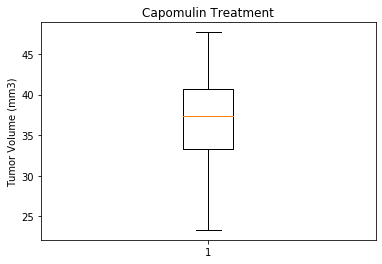

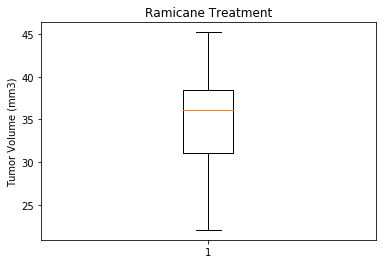

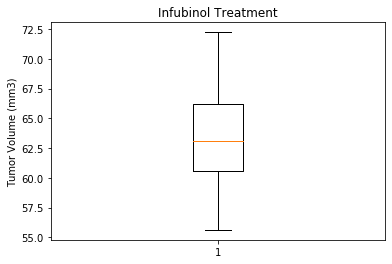

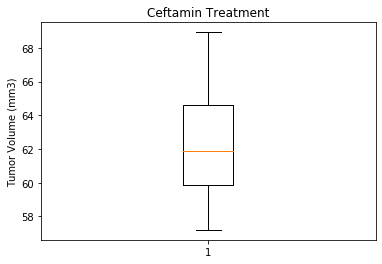

In [170]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(capomulin_vol)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Ramicane Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ramicane_vol)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Infubinol Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(infubinol_vol)
plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Ceftamin Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ceftamin_vol)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Mouse s185 Tumor Volume (mm3)')

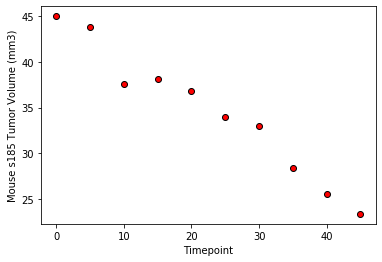

In [171]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#capomulin
#Selected s185
s185 = capomulin.loc[capomulin['Mouse ID']=="s185"]
s185
time = s185["Timepoint"]
tumor_s185 = s185['Tumor Volume (mm3)']
plt.scatter(time, tumor_s185, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Timepoint")
plt.ylabel("Mouse s185 Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

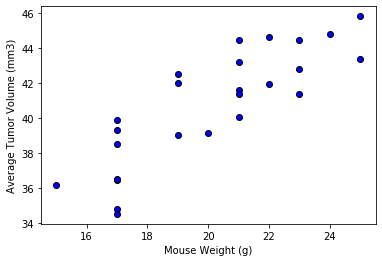

In [172]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#capomulin
mouse_weight = capomulin['Weight (g)'].groupby(clean_df['Mouse ID']).mean()
avg_tumor = capomulin['Tumor Volume (mm3)'].groupby(clean_df['Mouse ID']).mean()
plt.scatter(mouse_weight, avg_tumor, marker="o", facecolors="blue", edgecolors="black")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [173]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Correlation 
print(f"The correlation coefficient between Mouse Weight and Average Tumor Volume (mm3)is {round(st.pearsonr(mouse_weight, avg_tumor)[0],2)}")

The correlation coefficient between Mouse Weight and Average Tumor Volume (mm3)is 0.84


The r-squared is: 0.7088568047708717


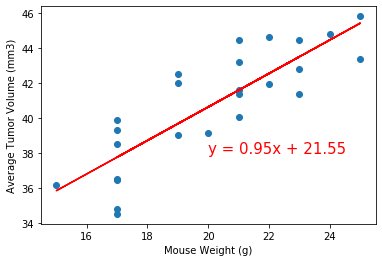

In [174]:
#Regression
x_values = mouse_weight
y_values = avg_tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()